### Problem Description

E-commerce dataset contains all the transactions occurring between 01/12/2010 and 09/12/2011 this notebook contain some analysis on the dataset and some visualization to understand the data well

## Packages

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.3)


from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import scipy
from sklearn.linear_model import Ridge

### Read Dataset

In [3]:
df = pd.read_csv("data.csv", encoding="ISO-8859-1", dtype={'CustomerID': str}, parse_dates=['InvoiceDate'])
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## EDA

In [5]:
missing_percentage = (df.isnull().sum()/541909)*100
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [6]:
# Removing None Customer IDs ... save clean dataframe with same variable `df`
... ## Write your code here
df.dropna(axis=0,inplace=True)

In [7]:
# Just for Checking 
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Q1: Which Country makes the most transactions?

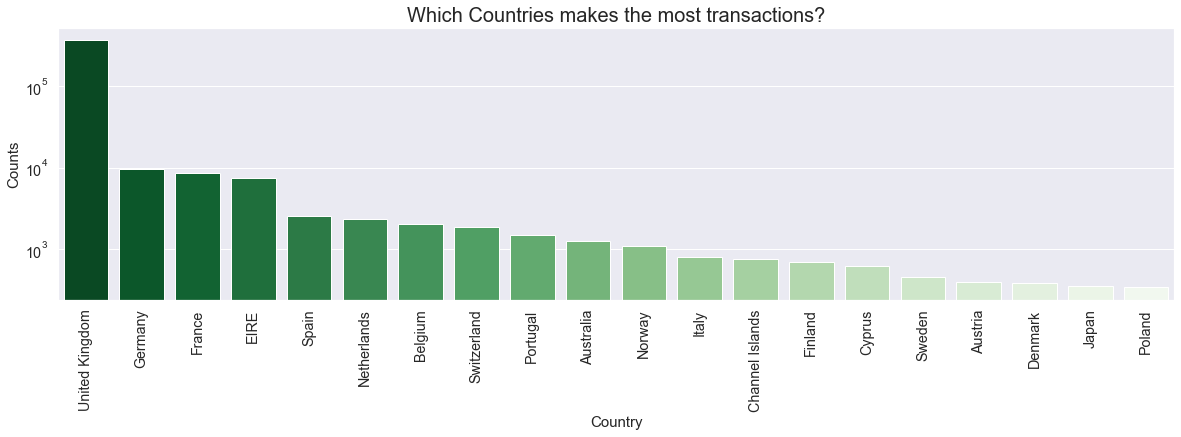

In [8]:
plt.figure(figsize=[20,5])

sns.barplot(x=df['Country'].value_counts().head(20).index, y=df['Country'].value_counts().head(20), 
            palette="Greens_r")
plt.xticks(rotation=90);
sns.set_style("white");
plt.yscale("log");
plt.title('Which Countries makes the most transactions?', fontsize= 20)
plt.xlabel('Country', fontsize=15);
plt.ylabel('Counts', fontsize=15);

plt.show()

In [9]:
df['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [10]:
print('Total transactions done: ',df['InvoiceNo'].nunique())

Total transactions done:  22190


### Q2: Show the Top 10 Customers how made the largest Revenue


In [11]:
df['Revenue'] = (df['Quantity'] * df['UnitPrice']) ## Write your code here

df_top_10 = df.groupby('CustomerID')[['Revenue']].agg(['sum']).sort_values(by=[('Revenue','sum')], ascending=False)

df_top_10.head(10)

,Revenue
,sum
CustomerID,
14646,279489.02
18102,256438.49
17450,187482.17
14911,132572.62
12415,123725.45
14156,113384.14
17511,88125.38
16684,65892.08


In [12]:
print('Total no. of customers: ',df['CustomerID'].nunique())
print('Products sold are : ',df['StockCode'].nunique())

Total no. of customers:  4372
Products sold are :  3684


### Q6: Calculate the Total Revenue for each Row

In [13]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df_new = df[['CustomerID','Revenue']]
df_new.head(10)

,CustomerID,Revenue
0,17850,15.30
1,17850,20.34
2,17850,22.00
3,17850,20.34
4,17850,20.34
5,17850,15.30
6,17850,25.50
7,17850,11.10
8,17850,11.10
9,13047,54.08


### Q3: Show Top 5 frequent Customers

In [14]:
Top_Frequent = pd.DataFrame(df['CustomerID'].value_counts())
Top_Frequent = Top_Frequent.rename(columns = {'CustomerID': 'Frequent'})

print("The index is CustomerID","\n")
Top_Frequent.head(5)

The index is CustomerID 



,Frequent
17841,7983
14911,5903
14096,5128
12748,4642
14606,2782


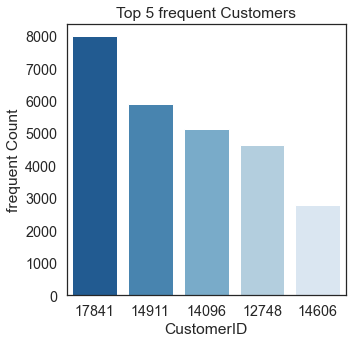

In [15]:
customer_counts = df.CustomerID.value_counts().sort_values(ascending=False).head(5)

fig, ax = plt.subplots(figsize = (5, 5))

sns.barplot(y = customer_counts.values, x = customer_counts.index, orient = "v", 
            ax = ax, order = customer_counts.index, palette = "Blues_r")

plt.title("Top 5 frequent Customers")
plt.ylabel("frequent Count")
plt.xlabel("CustomerID")

plt.show()

In [16]:
f"{df.shape[0]:,}"

'406,829'

### Q4: Create a histogram that reveals the count of words of 𝑫𝒆𝒔𝒄𝒓𝒊𝒑𝒕𝒊𝒐𝒏

In [17]:
list_df=len(list(df['Description']))
list_df

406829

D:\Anaconda\envs\Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


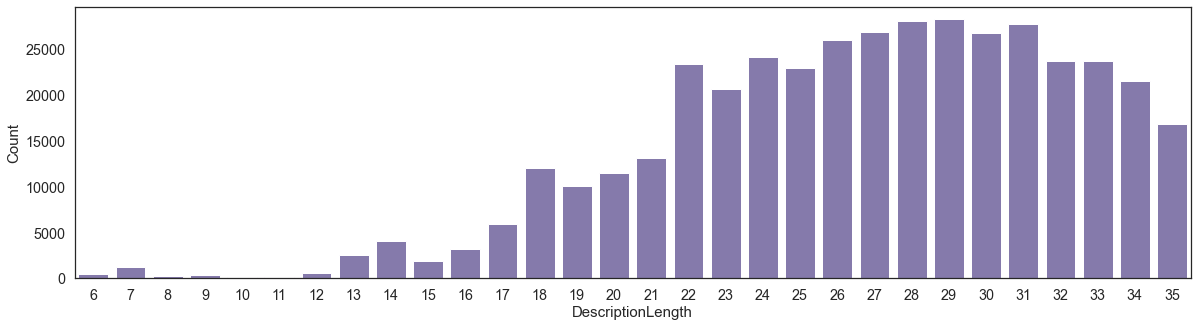

In [18]:
df["LengthOfDescription"] = df.Description.str.len()
fig, ax = plt.subplots(figsize=(20,5))

sns.countplot(df.LengthOfDescription, color="m")
sns.set_style("white");

plt.ylabel("Count", fontsize=15);
plt.xlabel("DescriptionLength", fontsize=15);

### Q5: Extract {𝑌𝑒𝑎𝑟, 𝑀𝑜𝑛𝑡ℎ, 𝑊𝑒𝑒𝑘, 𝑊𝑒𝑒𝑘𝐷𝑎𝑦, 𝐷𝑎𝑦, 𝐷𝑎𝑦𝑂𝑓𝑌𝑒𝑎𝑟,𝐷𝑎𝑡𝑒} features from 𝐼𝑛𝑣𝑜𝑖𝑐𝑒𝐷𝑎𝑡𝑒 feature
P.S: Date is based on Year, Month & Day features

In [19]:
df["Year"] = df["InvoiceDate"].dt.year 
df["Quarter"] = df["InvoiceDate"].dt.quarter 
df["Month"] = df["InvoiceDate"].dt.month 
df["Week"] =  df["InvoiceDate"].dt.week 
df["Weekday"] =  df["InvoiceDate"].dt.weekday 
df["Day"] = df["InvoiceDate"].dt.day 
df["Dayofyear"] =  df["InvoiceDate"].dt.dayofyear 
df["Date"] =  df["InvoiceDate"].dt.date 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19964\4076747891.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["Week"] =  df["InvoiceDate"].dt.week


In [20]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,LengthOfDescription,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,34,2010,4,12,48,2,1,335,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,19,2010,4,12,48,2,1,335,2010-12-01


### Q7 & Q8: Aggregate Revenue & Quantity across the grouped_features

In [21]:
grouped_features =['Date','Year','Quarter','Month','Week','Weekday','Dayofyear','Day','StockCode']

In [22]:
grouped_data=pd.DataFrame({'Quantity':df.groupby(grouped_features).Quantity.sum(),
                          'Revenue':df.groupby(grouped_features).Revenue.sum()}) 

In [23]:
grouped_data =grouped_data.reset_index()

In [24]:
grouped_data.head(5)

,Date,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,StockCode,Quantity,Revenue
0,2010-12-01,2010,4,12,48,2,335,1,10002,60,51.00
1,2010-12-01,2010,4,12,48,2,335,1,10125,2,1.70
2,2010-12-01,2010,4,12,48,2,335,1,10133,5,4.25
3,2010-12-01,2010,4,12,48,2,335,1,15044B,1,2.95
4,2010-12-01,2010,4,12,48,2,335,1,15056BL,20,113.00


#### Monthely Quantity order

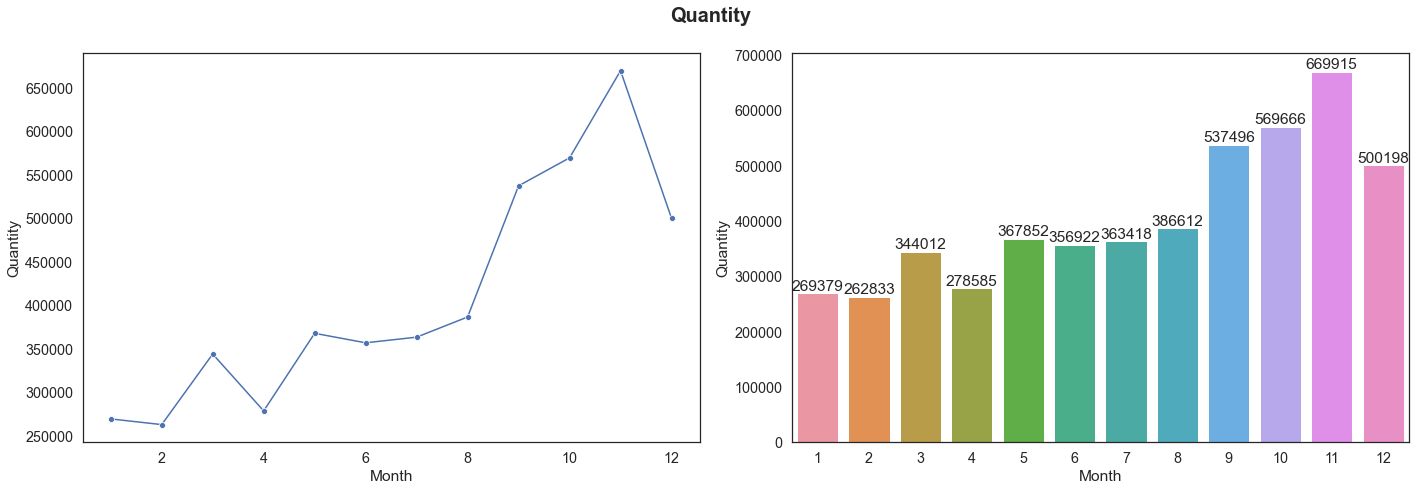

In [25]:
plt.figure(figsize=(20,7))

ax = plt.suptitle("Quantity",size=20,weight="bold")
data = df.groupby("Month")["Quantity"].sum().reset_index()

plt.subplot(1,2,1)
sns.lineplot(x="Month", y="Quantity", data=data, marker="o")

plt.subplot(1,2,2)
ax = sns.barplot(x="Month", y="Quantity", data=data)
plt.bar_label(ax.containers[0])

plt.tight_layout()

#### Daily Quantity order

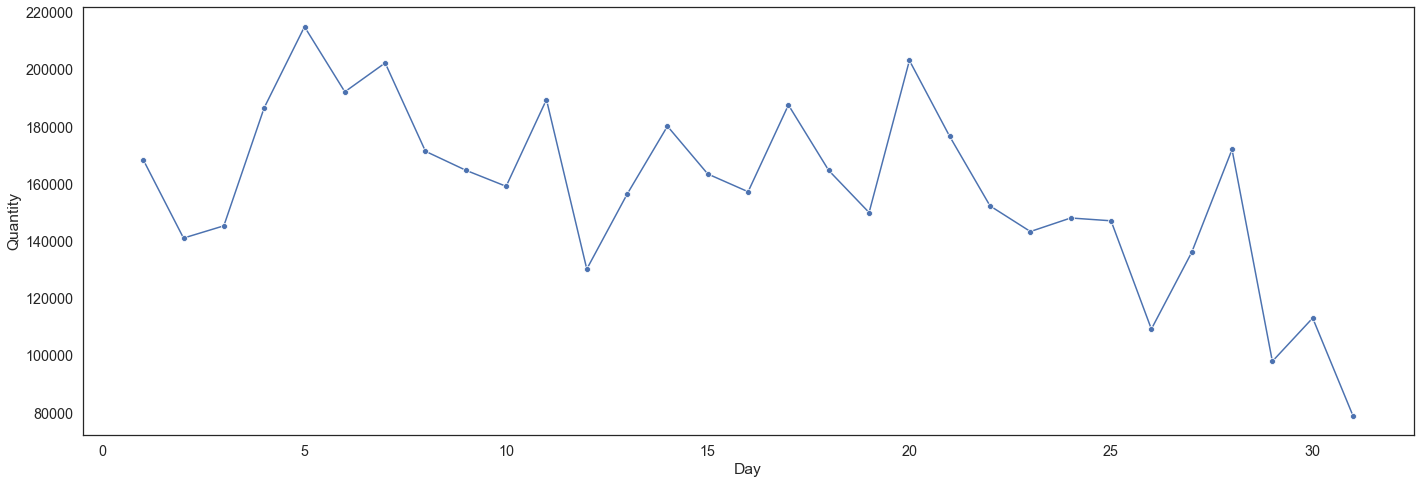

In [26]:
plt.figure(figsize=(20,7))
data = df.groupby("Day")["Quantity"].sum().reset_index()
sns.lineplot(x="Day", y="Quantity", data=data, marker="o")
plt.tight_layout()